<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

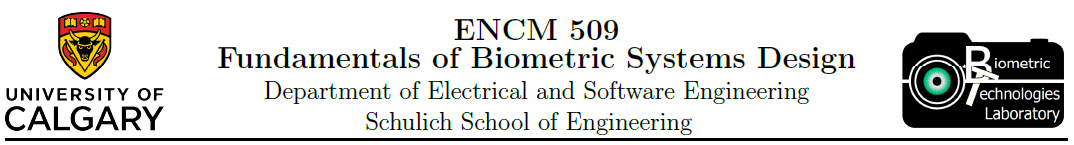

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# to keep a good size for the plot figure, not the plot area!
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

## Statistics

In [58]:
# Theorectical Mean and Std
mu = 50
std = 5
qtt_samples = 80

pop_norm = norm.rvs(mu, std, size=qtt_samples)
# pop_norm 

REAL mean: 49.31; std: 4.38


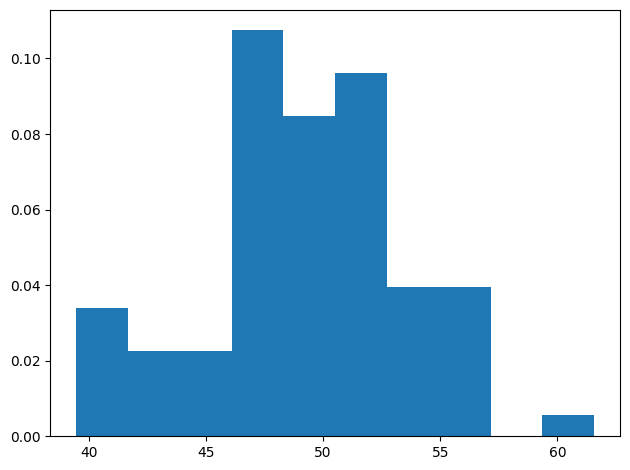

In [59]:
plt.hist(pop_norm, bins=10, density=True);
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm), np.std(pop_norm)))

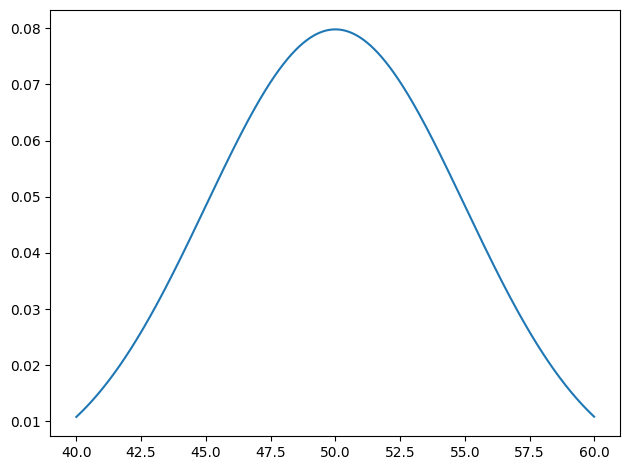

In [60]:
x = np.arange(40, 60, 0.01)

x_pdf = norm.pdf(x, loc=mu, scale=std)
plt.plot(x, x_pdf);

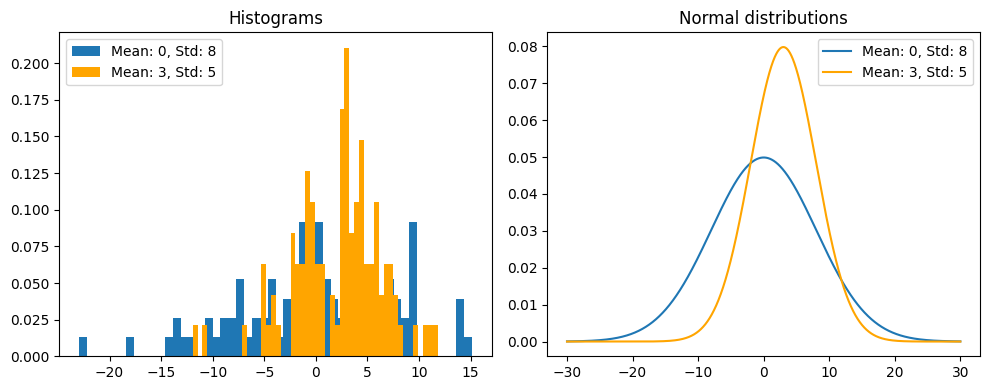

In [61]:
mu1, std1 = 0, 8 # blue
mu2, std2 = 3, 5 # orange

# population with higher variance
pop_norm1 = norm.rvs(mu1, std1, size=100)
pop_norm2 = norm.rvs(mu2, std2, size=100)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(pop_norm1, bins=50, density=True);
plt.hist(pop_norm2, bins=50, density=True, color='orange')
plt.title('Histograms')
plt.legend(['Mean: 0, Std: 8', 'Mean: 3, Std: 5'])

plt.subplot(1,2,2)
x1 = np.arange(-30, 30, 0.01)
plt.plot(x1, norm.pdf(x1, loc=mu1, scale=std1))
plt.plot(x1, norm.pdf(x1, loc=mu2, scale=std2), color='orange')
plt.legend(['Mean: 0, Std: 8', 'Mean: 3, Std: 5'])
plt.title('Normal distributions');

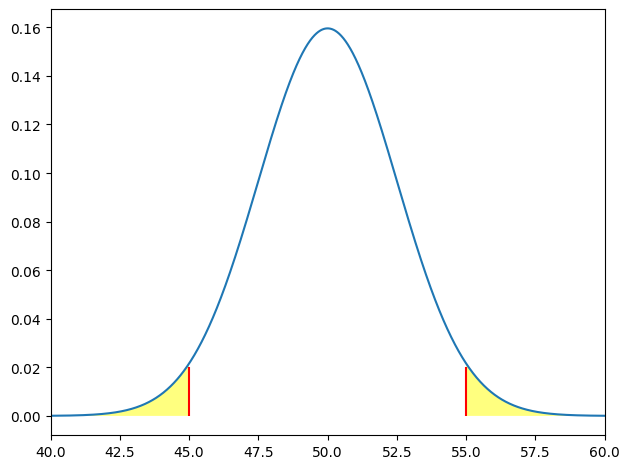

In [62]:
x = np.arange(0, 100, 0.01)

mu = 50
std = 2.5

x_pdf = norm.pdf(x, loc=mu, scale=std)

fig, ax = plt.subplots()
ax.plot(x, x_pdf)
# highlighting the critical regions
ax.fill_between(x, x_pdf, where=x<45, facecolor='yellow', alpha=0.5)
ax.fill_between(x, x_pdf, where=x>55, facecolor='yellow', alpha=0.5)

# lines corresponding to defined critical regions
ax.vlines([45, 55], 0, 0.02, 'r')
plt.xlim([40, 60]);

## Loading data
The data folder should be in the same directory as this Notebook

In [63]:
# data folder:
# 'signature_samples/biometrics/'
# 'signature_samples/calgary/'
# 'signature_samples/hello/'

# 'genuine' or 'impostor'
subdir = 'impostor/'
data_dir = '../signature_samples/biometrics/' + subdir

csv_file = pd.read_csv(data_dir + '2.csv')

coord1 = csv_file[['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

csv_file.head()

FileNotFoundError: [Errno 2] No such file or directory: '../signature_samples/biometrics/impostor/2.csv'

## Plotting based on Pressure

In [ ]:
# to correctly map the pressure into the colormap the normalization is required 
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)

pressuremap = cm.get_cmap('jet', np.max(prs1)+1)

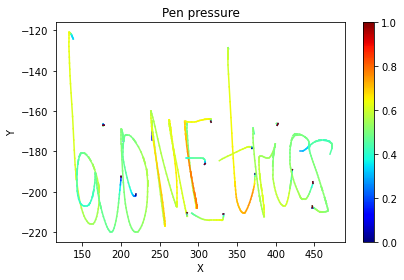

In [ ]:
for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff == 0:
        time_diff = 0.0001
        
    if time_diff < 17: # You may need to change this threshould
        im = plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

## Plotting presure over time

In [ ]:
# removing outliers (after normalization): < 250 and > 150
prs = []
for x in prs1:
    if (x > 150 and x < 250):
        prs.append(x)

In [ ]:
np.max(prs), np.min(prs), np.mean(prs)

(199, 151, 166.09756097560975)

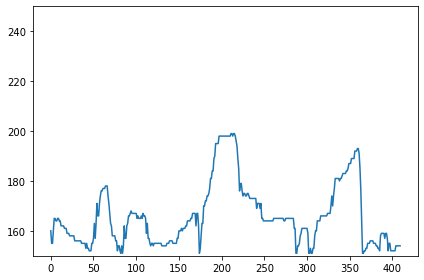

In [ ]:
plt.plot(prs)
plt.ylim([150, 250]);

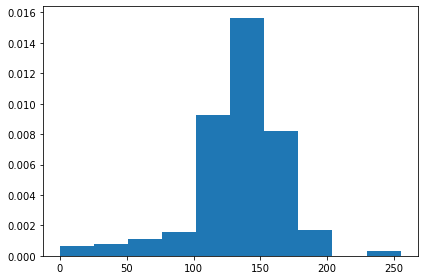

In [ ]:
plt.hist(prs1, density=True);

133.69387755102042 34.827276744508666


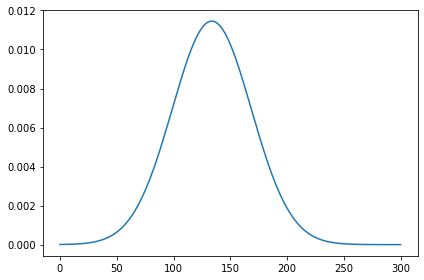

In [ ]:
mu_prs = np.mean(prs1)
std_prs = np.std(prs1)
print(mu_prs, std_prs)

x = np.arange(0, 300, 0.01)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)

plt.plot(x, x_pdf);

## Plotting and calculating the Velocity

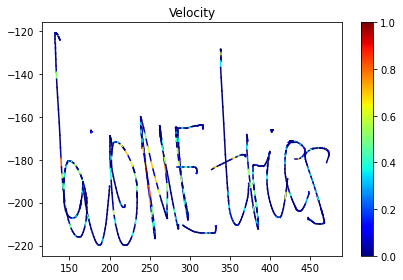

In [ ]:
vel = np.zeros((len(time1)-1, 1))

for i in range(len(time1)-1):
    distance = np.sqrt((coord1[i+1,0] - coord1[i,0])**2 + 
                       (coord1[i+1,1] - coord1[i,1])**2)

    # if too fast, time_diff = 0
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i] * 1000) + 1

vel = np.insert(vel, 0, 1)
vel = vel / np.max(vel) * 255
vel = vel.astype(int)

velmap = cm.get_cmap('jet', np.max(vel)+1)

for i in range(len(vel)-1):
    c = velmap(vel[i])
    
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 17: # You may need to change this threshould
        plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)
plt.title('Velocity')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

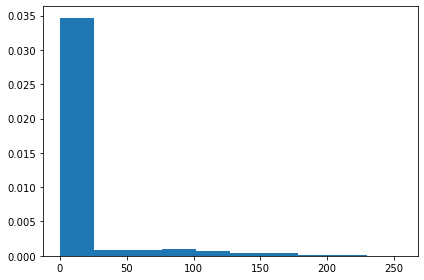

In [ ]:
plt.hist(vel, density=True);

## Plotting Pressure in 3D

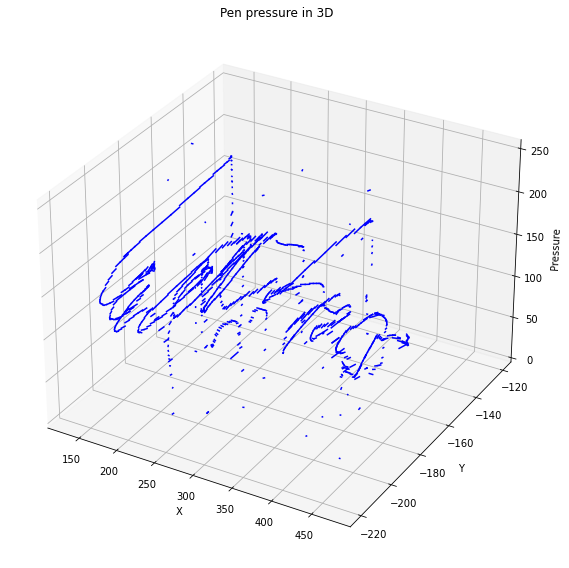

In [ ]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i in range(len(coord1)-1):
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 18: # You may need to change this threshould
        ax.plot3D(coord1[i:i+2,0], -coord1[i:i+2,1], prs1[i], color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

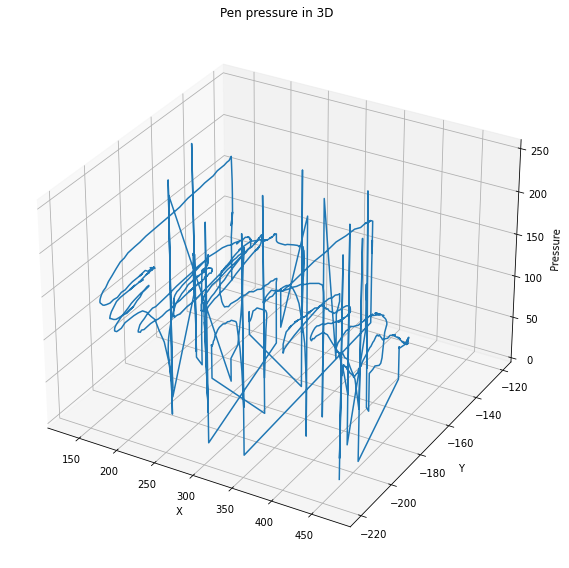

In [ ]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot3D(coord1[:,0].flatten(), -coord1[:,1].flatten(), prs1.flatten())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

## Statistical Evaluation

In [ ]:
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

In [ ]:
# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)
    
    stats_measures[i, 2] = np.mean(prs1)
    stats_measures[i, 3] = np.std(prs1)
    
    print('#%d - pressure: %.2f; velocity: %.2f' %\
          (i, np.mean(prs1), np.mean(vel)))

#0 - pressure: 0.21; velocity: 17.40
#1 - pressure: 0.26; velocity: 11.92
#2 - pressure: 0.30; velocity: 10.45
#3 - pressure: 0.25; velocity: 16.76
#4 - pressure: 0.20; velocity: 11.05
#5 - pressure: 0.23; velocity: 8.17
#6 - pressure: 0.22; velocity: 17.08
#7 - pressure: 0.20; velocity: 15.33
#8 - pressure: 0.20; velocity: 15.28
#9 - pressure: 0.22; velocity: 16.11
#10 - pressure: 0.22; velocity: 15.55
#11 - pressure: 0.19; velocity: 9.12
#12 - pressure: 0.22; velocity: 12.61
#13 - pressure: 0.27; velocity: 15.08
#14 - pressure: 0.27; velocity: 19.47
#15 - pressure: 0.28; velocity: 17.55
#16 - pressure: 0.21; velocity: 12.44
#17 - pressure: 0.26; velocity: 16.77
#18 - pressure: 0.28; velocity: 2.82
#19 - pressure: 0.24; velocity: 12.18
#20 - pressure: 0.22; velocity: 14.71
#21 - pressure: 0.27; velocity: 12.05
#22 - pressure: 0.23; velocity: 14.58
#23 - pressure: 0.25; velocity: 12.42
#24 - pressure: 0.31; velocity: 14.94
#25 - pressure: 0.27; velocity: 10.72
#26 - pressure: 0.24; vel

In [ ]:
# getting only the 1st velocity 'mean' and 'std'
print(stats_measures[0,0], stats_measures[0,1])

n = norm(stats_measures[0,0], stats_measures[0,1])

17.40276903713027 41.453395911666114


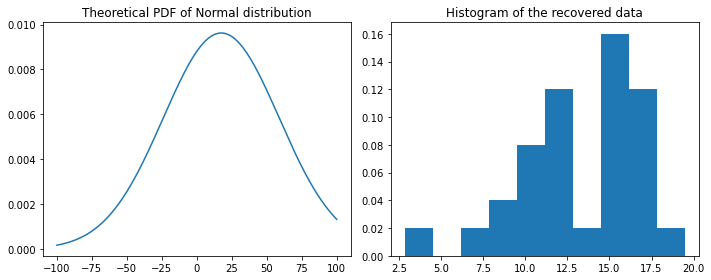

In [ ]:
x = np.arange(-100, 100, 0.1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, n.pdf(x))
plt.title('Theoretical PDF of Normal distribution');

plt.subplot(1,2,2)
plt.hist(stats_measures[:,0], density=True);
plt.title('Histogram of the recovered data');

# put the name of the set in the title

## Exercises

**General Marks**
1. Introduction (a paragraph about the purpose of the lab).
2. (10 marks) Description of the result on each exercise  with illustrations/graphs and analysis of the results (marks are distributed as shown in the Exercise section).
3. Conclusion (a paragraph on what is the main take-out of the lab).

**Specific Questions** (See the handout PDF for details)

- **Exercise 1** (2 marks): Consider a random sample of a normally distributed data with mean $\mu = 50$ and standard deviation $\sigma = 5$. The Scipy's function `norm.rvs(...)` is used to draw samples from a normal distribution.
    - Create another set of 1000 samples with $\mu = 50$ and $\sigma = 5$.
    - Plot the histogram with 100 bins.
    - Compare the results of the calculations of both sets. What conclusions can be drawn from the amount of samples compared with the mean and standard deviation calculated and the number of bins considered? 

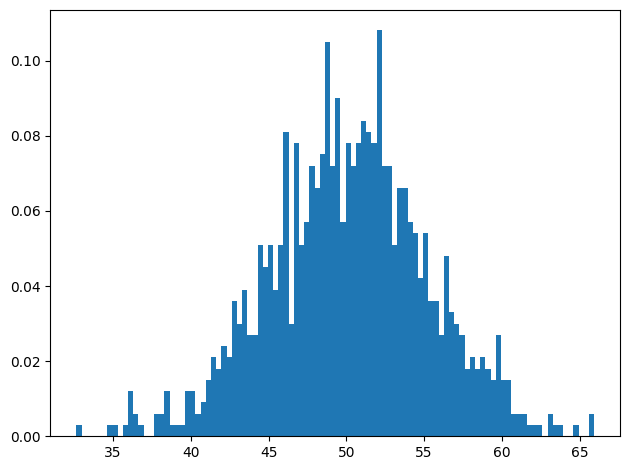

In [ ]:
# Theorectical Mean and Std
mu = 50
std = 5
qtt_samples = 1000

pop_norm = norm.rvs(mu, std, size=qtt_samples)

plt.hist(pop_norm, bins=100, density=True)
plt.show()

- **Exercise 2** (1 marks): Consider a sample data of the word *Biometrics* written by a "genuine" person, and an "impostor" as a signature that replicates the shape but not the original pressure. Load the sample signature provided.

In [3]:
import os

# make sure to put the correct path to where your data is.
# The dataset share on D2L has the following folders :
# ’ signature samples / biometrics /’
# ’ signature samples / calgary /’
# ’ signature samples / hello /’
# ’genuine ’ or ’impostor ’
direct = 'signature_samples/biometrics/impostor/2.csv'
data_dir = os.getcwd() + '/signature_samples/biometrics/impostor/'
csv_file = pd.read_csv(data_dir + '1.csv')
# show the first lines of the data loaded
# the file contains 4 columns : [X, Y, Time , Pressure ]
csv_file.head()
# splitting the original data/ matrix into 3 variables
coord1 = csv_file[['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

In [89]:
# to correctly map the pressure into the colormap the normalization is required 
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)

pressuremap = cm.get_cmap('jet', np.max(prs1)+1)

/var/folders/hy/3zt6fpm52v137lbvptw6fkjr0000gp/T/ipykernel_34879/910872588.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm);


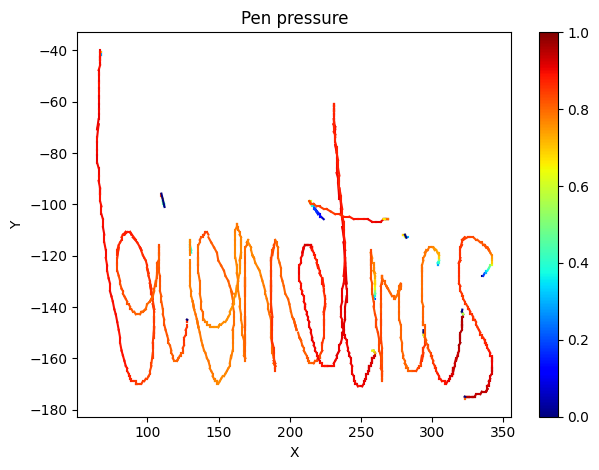

In [90]:
for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff == 0:
        time_diff = 0.0001
        
    if time_diff < 17: # You may need to change this threshould
        im = plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

127.66554621848739 28.92347026663071


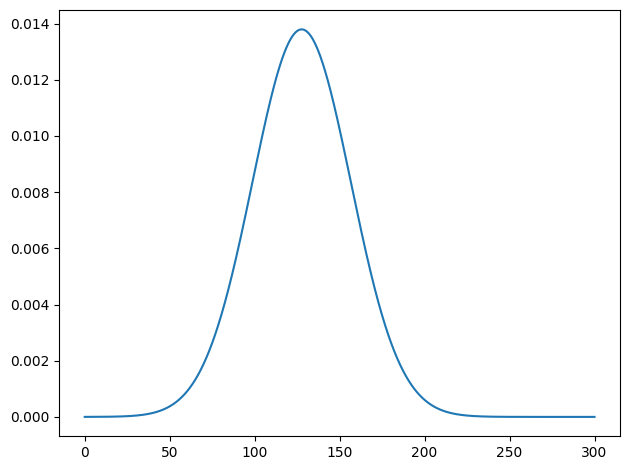

In [91]:
mu_prs = np.mean(prs1)
std_prs = np.std(prs1)
print(mu_prs, std_prs)

x = np.arange(0, 300, 0.01)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)

plt.plot(x, x_pdf);

- **Exercise 3** (1 mark): The code to calculate velocity and plot velocity map of one signature, provided in this lab, has the following `if` statement: `if time_diff == 0:`. Explain why it is necessary.

In [8]:
print(csv_file.head())

           X          Y  Pressure  Time
0  67.631005  41.681700  0.162419     0
1  67.631005  40.666956  0.273965    14
2  67.631005  41.681700  0.180029    14
3  67.631005  41.681700  0.217200    14
4  67.631005  40.666956  0.336589    29


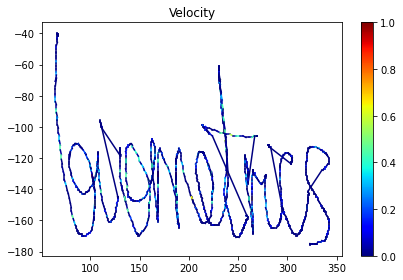

In [10]:
vel = np.zeros((len(time1)-1, 1))

for i in range(len(time1)-1):
    distance = np.sqrt((coord1[i+1, 0] - coord1[i ,0])**2 +
                       (coord1[i+1, 1] - coord1[i ,1])**2)
    
    # if too fast, time diff = 0
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i] * 1000) + 1
    
vel = np.insert(vel, 0, 1)
vel = vel/np.max(vel) * 255
vel = vel.astype(int)

velmap = cm.get_cmap('jet', np.max(vel)+1)
for i in range(len(vel)-1):
    c = velmap(vel[i])
    if time_diff < 17: # You may need to change this threshould
        im = plt.plot(coord1[i:i+2, 0], -coord1[i:i+2, 1], c=c)
plt.title('Velocity')
sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm)
    

In the above data there are three samples for time=14. This happens when a person moves their pens really fast so the sensor collects  multiple data points in a short period of time. Since our sensor only records integer seconds it appears as if the data is collected at the same time. To solve this problem we multiply our velocity vector by 1000 and add 1 to make it some large random number. Alternatively you could set time_diff to be a small number such as 0.0001 and calulcate velocity like normal. 

Text(0.5, 0.92, 'Pen pressure in 3D')

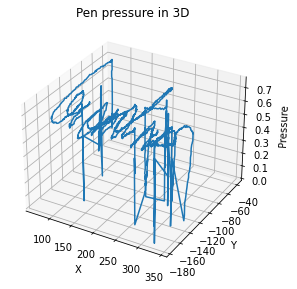

In [11]:
ax = plt.axes(projection='3d')

# the line below is to reshape to vector using . flatten method
ax.plot3D(coord1[:, 0].flatten(), -coord1[: ,1].flatten(), prs1.flatten())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title ('Pen pressure in 3D')

- **Exercise 4** (3 marks): Now  perform statistical analysis of pressure and velocity distribution  across average values of pressure or 30 signatures of the same person. We will represent the pressure of each signature by its average (mean) value, and then consider the distribution of these average values across genuine signatures. Consider 30 genuine signatures (yours or pre-recorded sample set, part a), and calculate average (mean) values and deviation from average (which will be calculated using standard deviation) for pressure. Plot a normal distribution of the average pressure values across the 30 signatures of the same individual. Perform the same for velocity. 

In [92]:
def calc_velocity (time , coords ):
    vel = np. zeros (( len(time)-1, 1))
    for i in range (len(time)-1):
        distance = np.sqrt((coords[i+1 ,0] - coords[i ,0])**2 + (coords[i+1 ,1] - coords[i ,1])**2)
        # if too fast time diff = 0
        time_diff = time[i+1] = time[i]
        if time_diff == 0:
            time_diff = 0.0001
        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1
    vel = np. insert (vel , 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel. astype (int)
    return vel

In [133]:
# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(os.getcwd() + '/Genuine/' + 'real%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)
    
    stats_measures[i, 2] = np.mean(prs1)
    stats_measures[i, 3] = np.std(prs1)
    
    print('#%d - pressure: %.2f; velocity: %.2f' %\
          (i, np.mean(prs1), np.mean(vel)))

#0 - pressure: 0.50; velocity: 9.96
#1 - pressure: 0.50; velocity: 8.14
#2 - pressure: 0.50; velocity: 8.24
#3 - pressure: 0.50; velocity: 8.93
#4 - pressure: 0.50; velocity: 8.12
#5 - pressure: 0.50; velocity: 7.57
#6 - pressure: 0.50; velocity: 10.37
#7 - pressure: 0.50; velocity: 7.47
#8 - pressure: 0.50; velocity: 14.08
#9 - pressure: 0.50; velocity: 13.63
#10 - pressure: 0.50; velocity: 14.34
#11 - pressure: 0.50; velocity: 11.61
#12 - pressure: 0.50; velocity: 9.20
#13 - pressure: 0.50; velocity: 10.65
#14 - pressure: 0.50; velocity: 11.73
#15 - pressure: 0.50; velocity: 11.90
#16 - pressure: 0.50; velocity: 10.66
#17 - pressure: 0.50; velocity: 7.48
#18 - pressure: 0.50; velocity: 11.92
#19 - pressure: 0.50; velocity: 14.10
#20 - pressure: 0.50; velocity: 13.00
#21 - pressure: 0.50; velocity: 10.95
#22 - pressure: 0.50; velocity: 13.05
#23 - pressure: 0.50; velocity: 16.01
#24 - pressure: 0.50; velocity: 14.22
#25 - pressure: 0.50; velocity: 10.43
#26 - pressure: 0.50; velocity:

- **Exercise 5** (3 marks): Perform statistical analysis of average pressure and velocity distribution across 30 impostor signatures. As an "impostor", you can use either the 30 "forged" signatures (or part $b$ of the pre-recorded set), or 30 writings by yourself, of different shape/word (or part $c$ of the pre-recorded set). Represent the pressure (or velocity) of each signature by its average (mean), and then consider the distribution of these averages across 30 impostor signatures. How different are those distributions for "genuine" signatures from Exercise 4 and the "impostor" from Exercise 5?

In [134]:
# columns: mean_vel, std_vec, mean_prs, std_prs
im_stats_measures = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(os.getcwd() + '/Imposter/' + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    im_stats_measures[i, 0] = np.mean(vel)
    im_stats_measures[i, 1] = np.std(vel)
    
    im_stats_measures[i, 2] = np.mean(prs1)
    im_stats_measures[i, 3] = np.std(prs1)
    
    print('#%d - pressure: %.2f; velocity: %.2f' %\
          (i, np.mean(prs1), np.mean(vel)))

#0 - pressure: 0.50; velocity: 13.44
#1 - pressure: 0.50; velocity: 11.50
#2 - pressure: 0.50; velocity: 9.63
#3 - pressure: 0.50; velocity: 11.22
#4 - pressure: 0.50; velocity: 13.86
#5 - pressure: 0.50; velocity: 11.80
#6 - pressure: 0.50; velocity: 12.63
#7 - pressure: 0.50; velocity: 10.78
#8 - pressure: 0.50; velocity: 12.39
#9 - pressure: 0.50; velocity: 14.88
#10 - pressure: 0.50; velocity: 15.28
#11 - pressure: 0.50; velocity: 11.60
#12 - pressure: 0.50; velocity: 14.93
#13 - pressure: 0.50; velocity: 17.32
#14 - pressure: 0.50; velocity: 15.31
#15 - pressure: 0.50; velocity: 16.82
#16 - pressure: 0.50; velocity: 15.14
#17 - pressure: 0.50; velocity: 11.06
#18 - pressure: 0.50; velocity: 12.75
#19 - pressure: 0.50; velocity: 12.19
#20 - pressure: 0.50; velocity: 13.23
#21 - pressure: 0.50; velocity: 14.56
#22 - pressure: 0.50; velocity: 15.87
#23 - pressure: 0.50; velocity: 15.68
#24 - pressure: 0.50; velocity: 13.18
#25 - pressure: 0.50; velocity: 20.63
#26 - pressure: 0.50; v

In [135]:
# getting only the 1st velocity 'mean' and 'std'
print(stats_measures[0,0], stats_measures[0,1])

n = norm(stats_measures[0,0], stats_measures[0,1])

9.958333333333334 20.401884723047655


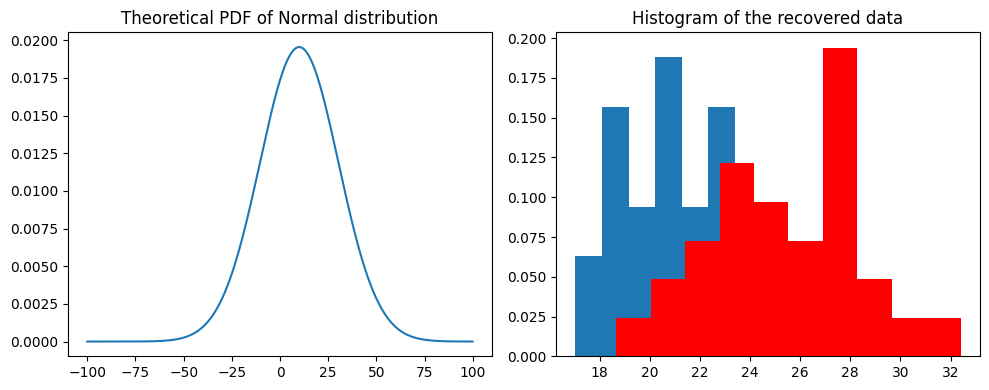

In [137]:
x = np.arange(-100, 100, 0.1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, n.pdf(x))
plt.title('Theoretical PDF of Normal distribution');

plt.subplot(1,2,2)
plt.hist(stats_measures[:,1], bins=10, density=True);
plt.hist(im_stats_measures[:,1], bins=10, density=True, color='red');
plt.title('Histogram of the recovered data');

# put the name of the set in the title